## Notebook to visualize Training data from PyTorch Dataloader

In [1]:
import json
from road_dataset import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
config = json.load(open('config.json'))

### Create Dataset.
#### Use 'multi_scale_pred' flag to get Multi-Scale Road Segmentations and Orientation GT

In [3]:
multi_scale_pred = False
dataset = DeepGlobeDatasetCorrupt(config['train_dataset'], 
                           seed = config['seed'])

train_loader = torch.utils.data.DataLoader(dataset,
                                           batch_size = config['train_batch_size'],
                                           num_workers=8,
                                           shuffle = True, 
                                           pin_memory=False)

### Iterate dataloader to visualize GT

torch.Size([32, 3, 256, 256])
torch.Size([32, 256, 256])
torch.Size([32, 256, 256])


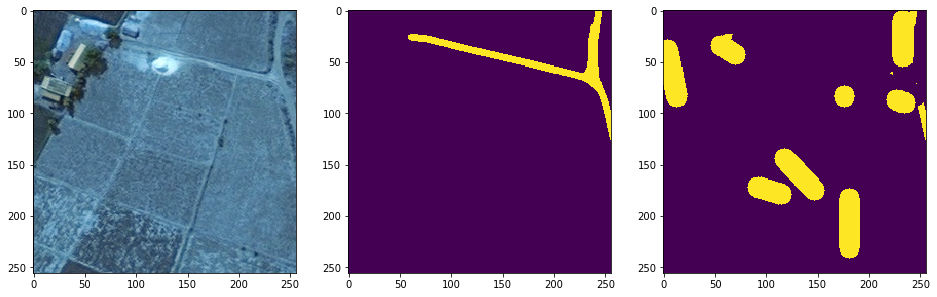

torch.Size([32, 3, 256, 256])
torch.Size([32, 256, 256])
torch.Size([32, 256, 256])


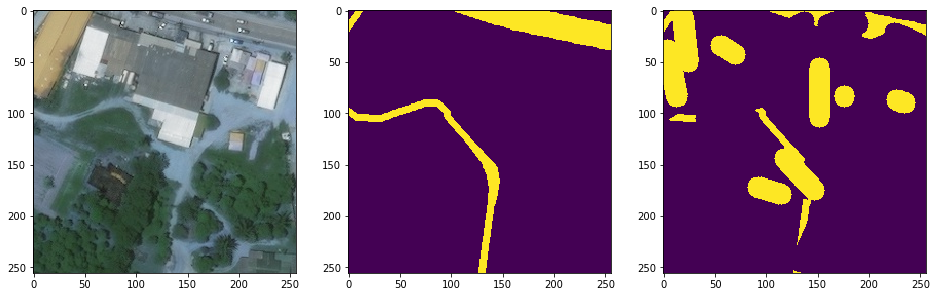

torch.Size([32, 3, 256, 256])
torch.Size([32, 256, 256])
torch.Size([32, 256, 256])


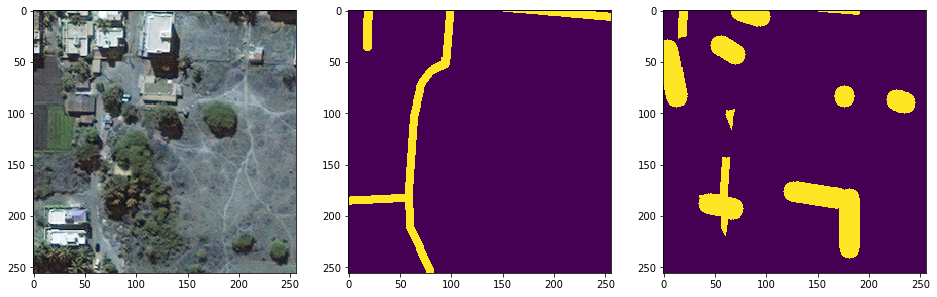

torch.Size([32, 3, 256, 256])
torch.Size([32, 256, 256])
torch.Size([32, 256, 256])


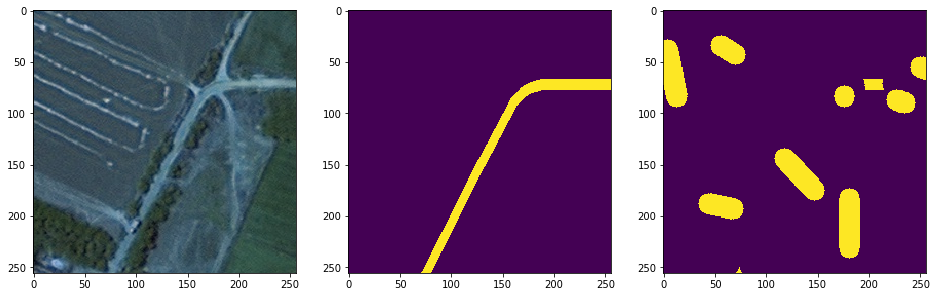

In [7]:
for i, data in enumerate(train_loader, 0):
    inputsBGR,labels,vecmap_angles = data
    print(inputsBGR.size())
    
    print(labels.size())
    print(vecmap_angles.size())
    
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow((inputsBGR[0].numpy().transpose(1,2,0)+ np.array(eval(config['train_dataset']['mean']))).astype(np.uint8))
    plt.subplot(132)
    plt.imshow(labels[0].numpy().astype(np.uint8))
    plt.subplot(133)
    plt.imshow(vecmap_angles[0].numpy())
    plt.show()
    if i > 2:
        break